In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn

### Data description
Data source: https://www.kaggle.com/sajidhussain3/jobathon-may-2021-credit-card-lead-prediction

ID : Unique Identifier for a row

Gender: Gender of the Customer

Age : Age of the Customer (in Years)

Region_Code : Code of the Region for the customers

Occupation : Occupation Type for the customer

Channel_Code : Acquisition Channel Code for the Customer (Encoded)

Vintage : Vintage for the Customer (In Months), Number of Days, Customer has been associated with the company

Credit_Product : If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)

Avg_Account_Balance : Average Account Balance for the Customer in last 12 Months

Is_Active : If the Customer is Active in last 3 Months

Is_Lead(Target) : If the Customer is interested for the Credit Card, 0 / 1: Customer is not interested / interested

### Load data and labels

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
train_data.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [4]:
test_data.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
5,MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,4624262,No
6,Y88TW36I,Female,69,RG253,Other,X2,67,No,1032764,No
7,3UGOAQNU,Female,30,RG257,Salaried,X1,33,No,837009,No
8,VVUKMUJT,Male,43,RG284,Salaried,X3,81,NaN,1001232,Yes
9,9R363ZXS,Female,54,RG283,Self_Employed,X2,37,Yes,1667851,No


Data from test.csv does not have label. Therefore, in the following analysis and modeling, I will use only data from train.csv and split into "train" and "test" sets.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


Training data has missing values in "Credit_Product" column. This will be handled in later step by imputation. 

### Data cleaning

1. Find missing values and fill with explanable logic
2. Drop columns that are not useful in analysis


ID is unique for each customer data, so it will not be encoded and considered in the following analysis and modeling. Age, Vintage and Avg_Account_Balance are numerical features; Gender, Region_Code, Occupation, Channel_Code, Credit_Product, and Is_Active are categorical features. Is_Lead is the target variable in this project.

In [6]:
# a helper function for plotting multiple histograms
def plotting_helper(row, col, features):
    features_name = features.columns
    fig, axs = plt.subplots(row, col, figsize=(10, 3*row))
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    counter = 0
    for i in range(0, row):
        for j in range(0, col):
            if counter >= len(features_name):
                break
            axs[i, j].hist(features[features_name[counter]])
            axs[i, j].set_title(features_name[counter])
            if features_name[counter] == 'Region_Code':
                axs[i, j].tick_params('x', labelrotation = 60)

            counter += 1

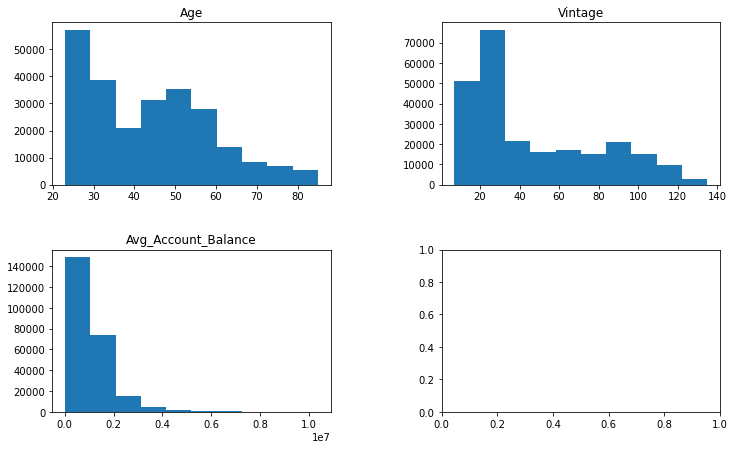

In [7]:
# Plot numerical features in train data to see the distribution
numerical = ['Age', 'Vintage', 'Avg_Account_Balance']
plotting_helper(2, 2, train_data[numerical])

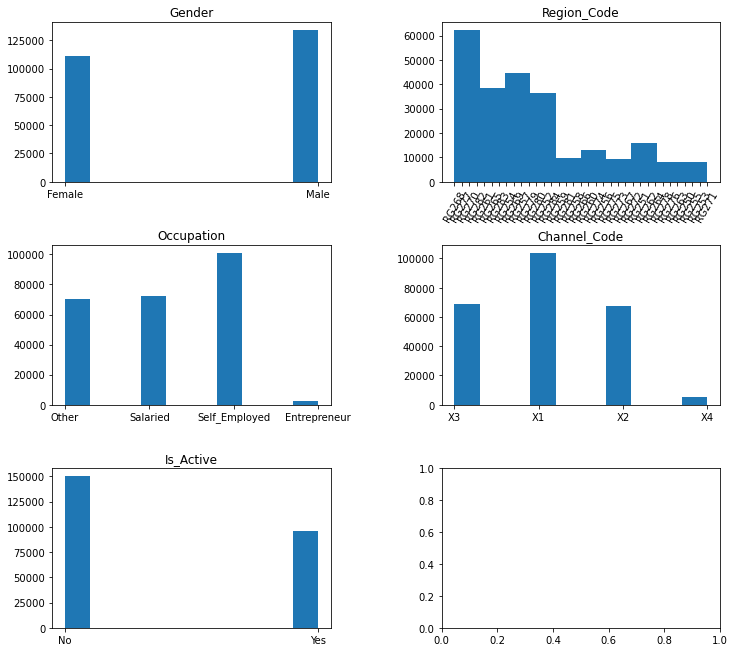

In [8]:
# Plot the distributions of categorical features
# Because Credit_Product contains na values, I plot it in next cell
categorical = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Is_Active']
plotting_helper(3, 2, train_data[categorical])

Region_Code had so many unique values with code instead of meaningful name for each region, therefore I will not include it in analysis and modeling.

(array([144357.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  72043.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

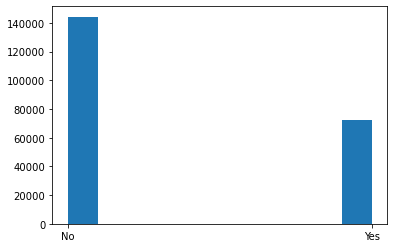

In [9]:
# Plot non_na values in Credit_Product column
plt.hist(train_data['Credit_Product'].dropna())

0    187437
1     58288
Name: Is_Lead, dtype: int64


(array([187437.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  58288.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

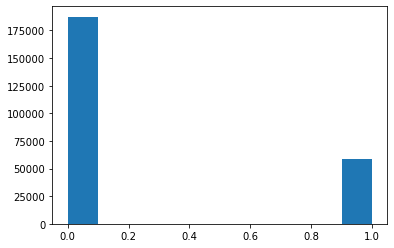

In [10]:
# target distribution
print(train_data['Is_Lead'].value_counts())
plt.hist(train_data['Is_Lead'])

### Data preprocessing
 

Before preprocessing, I drop the unused ID and Region_Code features, and split the current "train" dataset into training and testing data, in order to train and score model performace with labeled data. 

In [11]:
from sklearn.model_selection import train_test_split

y = train_data['Is_Lead'] # the target variable to be classified and predicted
X = train_data.drop(columns=['Is_Lead', 'ID', 'Region_Code'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
138403,Female,30,Salaried,X3,20,No,1726840,No
117015,Female,55,Self_Employed,X1,37,No,303187,No
322,Female,33,Salaried,X1,13,No,886813,No
64910,Female,48,Self_Employed,X3,92,Yes,1227416,Yes
39919,Female,31,Other,X1,19,No,717553,No
...,...,...,...,...,...,...,...,...
119879,Male,43,Self_Employed,X2,19,Yes,2319687,No
103694,Male,39,Self_Employed,X4,13,No,854845,No
131932,Male,58,Self_Employed,X2,63,Yes,1068569,Yes
146867,Male,29,Other,X1,32,No,1685099,No


In [12]:
# reset index of training data
X_train = X_train.reset_index().drop(columns=['index'])
X_test = X_test.reset_index().drop(columns=['index'])
y_train = y_train.reset_index().drop(columns=['index'])
y_test = y_test.reset_index().drop(columns=['index'])
X_train

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,30,Salaried,X3,20,No,1726840,No
1,Female,55,Self_Employed,X1,37,No,303187,No
2,Female,33,Salaried,X1,13,No,886813,No
3,Female,48,Self_Employed,X3,92,Yes,1227416,Yes
4,Female,31,Other,X1,19,No,717553,No
...,...,...,...,...,...,...,...,...
172002,Male,43,Self_Employed,X2,19,Yes,2319687,No
172003,Male,39,Self_Employed,X4,13,No,854845,No
172004,Male,58,Self_Employed,X2,63,Yes,1068569,Yes
172005,Male,29,Other,X1,32,No,1685099,No


Since the missing values in Credit_Product column take only 1/10 in the training dataset, imputing is reasonable. Because the training data is already imbalanced (about twice of No than Yes) in Credit_Product, imputing missing values with the mode will only increase the imbalance, which can exaggerate the percentage of No in data and deivate from the real situation. Therefore, here I will use "unknown" as the third category to impute missing values, because first, missing values do not imply that these customers do not own active credit product; moreover, I wonder whether this "unknown" status can potentially influence the classification of a customer's interest in the credit card. 

In [13]:
# Check the percentage of missing values in Credit_Product
len(X_train[X_train['Credit_Product'].isna()])/len(X_train)

0.11919863726476249

In [14]:
X_train['Credit_Product'].replace(np.nan, 'unknown', inplace=True)
X_test['Credit_Product'].replace(np.nan, 'unknown', inplace=True)
X_train['Credit_Product'].unique()

array(['No', 'Yes', 'unknown'], dtype=object)

#### Numerical features: scaling

In [15]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
scaler = StandardScaler().fit(X_train_scaled[numerical])
X_train_scaled[numerical] = scaler.transform(X_train_scaled[numerical])
X_test_scaled[numerical] = scaler.transform(X_test_scaled[numerical])

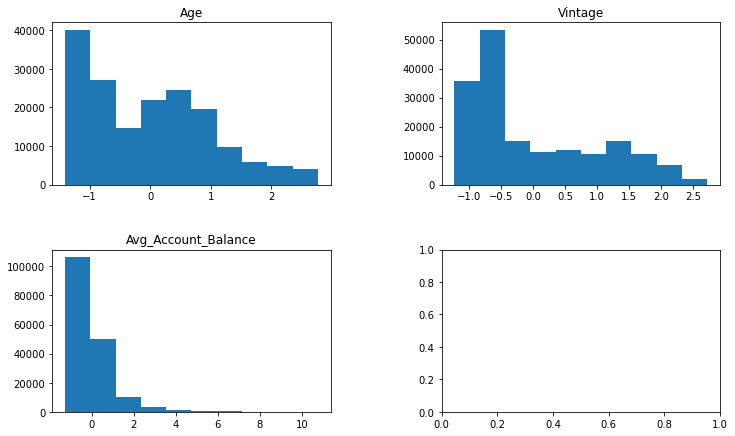

In [16]:
plotting_helper(2, 2, X_train_scaled[numerical])

#### Categorical features: encoding

In [17]:
categorical = ['Gender', 'Occupation', 'Channel_Code', 'Is_Active', 'Credit_Product']
categorical

['Gender', 'Occupation', 'Channel_Code', 'Is_Active', 'Credit_Product']

In [18]:
for feature in categorical:
    print(f'{feature}: {X_train_scaled[feature].unique()}')

Gender: ['Female' 'Male']
Occupation: ['Salaried' 'Self_Employed' 'Other' 'Entrepreneur']
Channel_Code: ['X3' 'X1' 'X2' 'X4']
Is_Active: ['No' 'Yes']
Credit_Product: ['No' 'Yes' 'unknown']


For the all categorical features, I will use OneHotEncoder, because the unique values of these features may not exist specific order. Although Channel_code are in the encoded format, according to data description, there is no evidence that the 4 unique values are in ordinal relationship, so I still create a binary column for each channel. 

In [19]:
from sklearn.preprocessing import OneHotEncoder

X_train_encode = X_train_scaled.copy()
X_test_encode = X_test_scaled.copy()
oh_encoder = OneHotEncoder().fit(X_train_encode[categorical])
X_train_encode = pd.concat([X_train_encode, pd.DataFrame(oh_encoder.transform(X_train_encode[categorical]).toarray(), columns=oh_encoder.get_feature_names(categorical))], axis=1).drop(columns=categorical)
X_test_encode = pd.concat([X_test_encode, pd.DataFrame(oh_encoder.transform(X_test_encode[categorical]).toarray(), columns=oh_encoder.get_feature_names(categorical))], axis=1).drop(columns=categorical)
X_train_encode

,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Active_No,Is_Active_Yes,Credit_Product_No,Credit_Product_Yes,Credit_Product_unknown
0,-0.933883,-0.832754,0.697878,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.749235,-0.307410,-0.963535,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.731909,-1.049072,-0.282440,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.277962,1.392232,0.115046,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.866558,-0.863657,-0.479967,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172002,-0.058661,-0.863657,1.389735,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
172003,-0.327960,-1.049072,-0.319747,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
172004,0.951210,0.496057,-0.070329,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
172005,-1.001208,-0.461923,0.649166,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Modeling

In [20]:
y_train = y_train['Is_Lead']
y_test = y_test['Is_Lead']

#### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42).fit(X_train_encode, y_train)
log_reg.score(X_test_encode, y_test)

0.8524376678694484

In [22]:
# Check feature coefficients and find the most important feature
feat_coef = dict(zip(X_train_encode.columns, log_reg.coef_[0]))
for f in sorted(feat_coef, key=feat_coef.get, reverse=True):
    print(f'{f}: {feat_coef[f]}')

Credit_Product_unknown: 2.075737378954541
Occupation_Salaried: 0.49610841503707476
Vintage: 0.2885506809755079
Channel_Code_X2: 0.2695164237564721
Occupation_Entrepreneur: 0.2570302057542908
Channel_Code_X4: 0.14478646399042627
Age: 0.13125803028101343
Channel_Code_X3: 0.12885361208152762
Is_Active_Yes: 0.1032090346058679
Avg_Account_Balance: -0.02929365872926104
Gender_Male: -0.043612124571805945
Gender_Female: -0.0970722410609721
Is_Active_No: -0.24389340023864498
Credit_Product_Yes: -0.2964814380275185
Occupation_Self_Employed: -0.39205530255842713
Occupation_Other: -0.5017676838657157
Channel_Code_X1: -0.6838408654612022
Credit_Product_No: -1.9199403065597966


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, log_reg.predict(X_test_encode), target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.86      0.97      0.91     56260
         Yes       0.82      0.48      0.61     17458

    accuracy                           0.85     73718
   macro avg       0.84      0.73      0.76     73718
weighted avg       0.85      0.85      0.84     73718



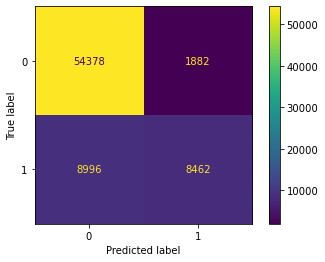

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, log_reg.predict(X_test_encode), labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()

Good in predicting true negatives, but false negatives are about the same number as true negatives. 

#### Gaussian Naive Bayes Classifier

In [25]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB().fit(X_train_encode, y_train)
nb_clf.score(X_test_encode, y_test)

0.831547247619306

In [26]:
print(classification_report(y_test, nb_clf.predict(X_test_encode), target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89     56260
         Yes       0.65      0.62      0.64     17458

    accuracy                           0.83     73718
   macro avg       0.77      0.76      0.76     73718
weighted avg       0.83      0.83      0.83     73718



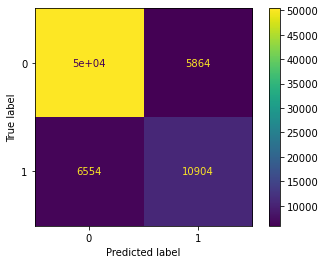

In [27]:
cm = confusion_matrix(y_test, nb_clf.predict(X_test_encode), labels=nb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_clf.classes_)
disp.plot()

Great performance in predicting true positive, but worse performance in predicting true negative. However, to reach out to customers who are interested in the credit card, false positive would have a lower cost than false negative, so that the bank would less likely miss potential customers. 

#### Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42).fit(X_train_encode, y_train)
tree_clf.score(X_test_encode, y_test)

0.8537127974171844

In [29]:
feat_coef = dict(zip(X_train_encode.columns, tree_clf.feature_importances_))
for f in sorted(feat_coef, key=feat_coef.get, reverse=True):
    print(f'{f}: {feat_coef[f]}')

Credit_Product_unknown: 0.6296997716004143
Credit_Product_No: 0.2185998944141186
Vintage: 0.08278725796982082
Occupation_Salaried: 0.0401385068725643
Is_Active_Yes: 0.022240469067452813
Age: 0.004241650693512157
Channel_Code_X1: 0.0020556132140124076
Occupation_Other: 0.0001388260541920803
Avg_Account_Balance: 9.801011391238092e-05
Gender_Female: 0.0
Gender_Male: 0.0
Occupation_Entrepreneur: 0.0
Occupation_Self_Employed: 0.0
Channel_Code_X2: 0.0
Channel_Code_X3: 0.0
Channel_Code_X4: 0.0
Is_Active_No: 0.0
Credit_Product_Yes: 0.0


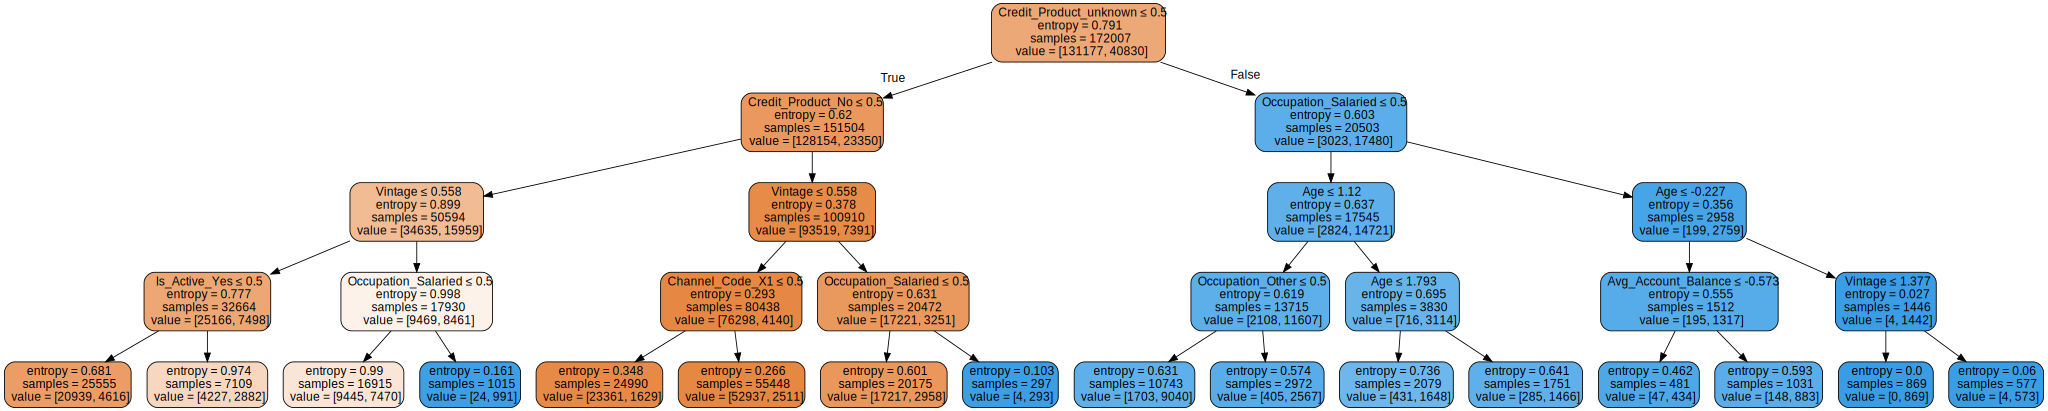

In [30]:
import graphviz

tree_clf_graph = sklearn.tree.export_graphviz(tree_clf, 
                      out_file=None, 
                      feature_names=X_train_encode.columns,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(tree_clf_graph)  
graph 

Combining feature importances and the tree visualization, Credit_Product_unknown is the most important feature in classifying instances. Other important features include Credit_Product_no, owning a salaried occupation (Occupation_Salaried), time in months that the customers have been associated with the bank (Vintage), Age, and whether the customers were active in the past 3 months (Is_Active) before data collection. 

In [31]:
print(classification_report(y_test, tree_clf.predict(X_test_encode), target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.85      0.98      0.91     56260
         Yes       0.86      0.46      0.60     17458

    accuracy                           0.85     73718
   macro avg       0.86      0.72      0.75     73718
weighted avg       0.85      0.85      0.84     73718



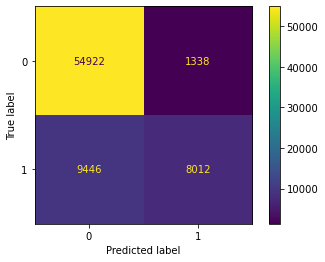

In [32]:
cm = confusion_matrix(y_test, tree_clf.predict(X_test_encode), labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()

Performs good in true negative, but similar to logistic regression, it could not correctly classify originally positive cases, so that for customers who are interested in the credit card, it tends to classify them as not interested, which can make the bank miss their potential customers.

#### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion='entropy', max_depth=4, random_state=42).fit(X_train_encode, y_train)
rf_clf.score(X_test_encode, y_test)

0.8514338424808052

In [34]:
feat_coef = dict(zip(X_train_encode.columns, rf_clf.feature_importances_))
for f in sorted(feat_coef, key=feat_coef.get, reverse=True):
    print(f'{f}: {feat_coef[f]}')

Credit_Product_unknown: 0.40370316685395885
Credit_Product_No: 0.2403771539963884
Age: 0.10006713174666186
Channel_Code_X1: 0.07007255777261526
Vintage: 0.06601286280910844
Credit_Product_Yes: 0.052832885400638664
Occupation_Salaried: 0.01929417029892634
Channel_Code_X3: 0.013652805494817958
Channel_Code_X2: 0.013560639791786585
Is_Active_Yes: 0.006066403459984433
Is_Active_No: 0.005489666091799894
Occupation_Entrepreneur: 0.0032389246291006715
Occupation_Self_Employed: 0.0024080237352867334
Occupation_Other: 0.0021750853978735004
Avg_Account_Balance: 0.00045714773991541353
Channel_Code_X4: 0.00031160535117303657
Gender_Female: 0.00019569398478656473
Gender_Male: 8.407544517743268e-05


In [35]:
print(classification_report(y_test, rf_clf.predict(X_test_encode), target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.85      0.98      0.91     56260
         Yes       0.85      0.45      0.59     17458

    accuracy                           0.85     73718
   macro avg       0.85      0.71      0.75     73718
weighted avg       0.85      0.85      0.83     73718



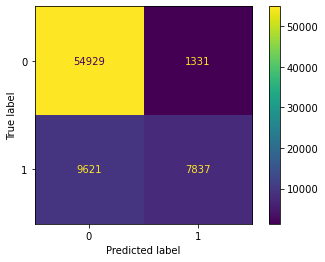

In [36]:
cm = confusion_matrix(y_test, rf_clf.predict(X_test_encode), labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()

Performs even worse than DT to correctly identify potential customers and classify them into positive class.

#### Compare with KMeans

The motivation is that I want to know whether the positive and negative instances in the training data can already form 2 clear clusters without any training labels. If the features themselves can correctly form 2 clusters, then either the 4 supervised models are supposed to perform better, or more information and features are needed for those 4 models to capture the patterns. 

In [37]:
# compare prediction with K-means clustering on test.csv data
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train_encode)
pred = kmeans.predict(X_test_encode)


In [38]:
kmeans.inertia_

727145.805826889

In [39]:
test_result = pd.DataFrame({'predicted': pred, 'truth': y_test})
test_result[test_result['predicted'] != test_result['truth']]

,predicted,truth
0,1,0
1,1,0
5,1,0
8,1,0
9,1,0
...,...,...
73703,1,0
73704,1,0
73706,1,0
73712,1,0


Since there are only two classes, I can calculate how accurate KMeans clusters the datapoints. The "real" class 0 seem to be cluster 0 (in this case accuracy is higher), so I check the percentage of instances with predicted clusters that match the labels. 

In [40]:
accuracy = len(test_result[test_result['predicted'] == test_result['truth']])/len(test_result)
accuracy

0.6186684391871727

The features themselves could not form correct clusters as good as the 4 supervised models above, showing that training with labels helped improve the predictability above mere features.

In [41]:
from sklearn.metrics import rand_score

rand_score(y_test, kmeans.predict(X_test_encode))

0.5281579962833373

The rand score measures the similarity between 2 clusters, where rand score = 1 is a perfect match. 0.52 may not be a good enough score to clearly separate the 2 clusters. 

### Classification Report

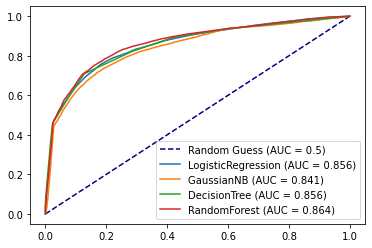

In [42]:
# AUC score/ROC curve
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, log_reg.decision_function(X_test_encode))
log_reg_auc = roc_auc_score(y_test, log_reg.decision_function(X_test_encode))
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, nb_clf.predict_proba(X_test_encode)[:, 1])
nb_clf_auc = roc_auc_score(y_test, nb_clf.predict_proba(X_test_encode)[:, 1])
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, tree_clf.predict_proba(X_test_encode)[:, 1])
tree_clf_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test_encode)[:, 1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_clf.predict_proba(X_test_encode)[:, 1])
rf_clf_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test_encode)[:, 1])

plt.plot([0, 1], [0, 1], color="navy", linestyle="--", label='Random Guess (AUC = 0.5)')
plt.plot(fpr_lr, tpr_lr, label='%s (AUC = %0.3f)' % ("LogisticRegression", log_reg_auc))
plt.plot(fpr_gnb, tpr_gnb, label='%s (AUC = %0.3f)' % ("GaussianNB", nb_clf_auc))
plt.plot(fpr_tree, tpr_tree, label='%s (AUC = %0.3f)' % ("DecisionTree", tree_clf_auc))
plt.plot(fpr_rf, tpr_rf, label='%s (AUC = %0.3f)' % ("RandomForest", rf_clf_auc))
plt.legend()

### Error Analysis

Next I will conduct error analysis by comparing the predicted labels from each model with the truth labels, and handpick 10 wrongly-classified instances from the following three cases: 
1. Truth label = 0, all 4 models classified as 1 (False positive)
2. Truth label = 1, all 4 models classified as 0 (False negative)
3. At least two models classified correctly, and at least one model classified differently from the truth labels.  

In [43]:
pred = []
for model in [log_reg, nb_clf, tree_clf, rf_clf]:
    pred.append(model.predict(X_test_encode))
errors = pd.DataFrame({'truth': y_test, 'lr_pred': pred[0], 'nb_pred': pred[1], 'tree_pred': pred[2], 'rf_pred': pred[3]})

In [44]:
errors['err_sum'] = errors['lr_pred'] + errors['nb_pred'] + errors['tree_pred'] + errors['rf_pred'] - errors['truth']
errors.sort_values(by='err_sum', ascending=False)

,truth,lr_pred,nb_pred,tree_pred,rf_pred,err_sum
30543,0,1,1,1,1,4
68497,0,1,1,1,1,4
60763,0,1,1,1,1,4
14722,0,1,1,1,1,4
46807,0,1,1,1,1,4
...,...,...,...,...,...,...
16592,1,0,0,0,0,-1
16584,1,0,0,0,0,-1
16573,1,0,0,0,0,-1
16565,1,0,0,0,0,-1


10 false positives from all 4 models 

In [45]:
fp_idx = errors.sort_values(by='err_sum', ascending=False)[:10].index
fp_df = []
for i in fp_idx:
    fp_df.append(X_test_encode.iloc[int(i)])
pd.DataFrame(fp_df)

,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Active_No,Is_Active_Yes,Credit_Product_No,Credit_Product_Yes,Credit_Product_unknown
30543,1.153184,0.866888,-0.342181,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
68497,-0.731909,-0.863657,0.209096,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
60763,-0.462610,0.434252,-0.472084,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
14722,-1.135857,-0.647339,-0.870484,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
46807,1.557132,-0.121995,0.225818,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
60793,1.826431,1.423135,1.957837,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
46765,0.681911,1.237719,-0.510150,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
60820,0.951210,1.793966,0.728777,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
68514,0.412612,0.619668,-0.659506,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30759,-0.327960,-0.678241,-0.130861,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


10 false negative from all 4 models

In [46]:
fn_idx = errors.sort_values(by='err_sum', ascending=True)[:10].index
fn_df = []
for i in fn_idx:
    fn_df.append(X_test_encode.iloc[int(i)])
pd.DataFrame(fn_df)

,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Active_No,Is_Active_Yes,Credit_Product_No,Credit_Product_Yes,Credit_Product_unknown
34495,-1.068532,-0.987267,-0.633436,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9567,1.287833,-0.461923,0.149062,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
43518,-0.799233,-0.616436,1.290399,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26641,-0.462610,-1.018170,0.605584,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9562,-0.260636,-1.049072,0.116178,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
62929,-0.058661,1.392232,-0.309309,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
9552,-0.529934,-0.647339,-0.136022,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
43502,-0.731909,-0.863657,-0.232575,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9545,-0.799233,-0.461923,0.234822,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
43484,-1.135857,-0.431020,-0.832678,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Comparing false positives and false negatives, Credit_Product and Occupation_Salaried apparently have different patterns in these two cases. As observed in the decision tree classifier, Credit_Product is the first feature that splits instances into different classes, where customers with no data about owning active credit products and with a salaried occupation are more likely to show interests in the bank's credit card. However, in the 10 false negative and 10 false positive instances here, the 4 models seemed to overly rely on missing Credit_Product values and to make classifications, and thus even customers with occupations not in the salaried category were falsely classified as interested in credit card. 

10 mixed instances on which at least 2 models classified correctly and at least 1 model did wrong

In [47]:
half = errors[errors['err_sum'] == 2][:10]
half_df = []
for i in half.index:
    half_df.append(X_test_encode.iloc[int(i)])
pd.concat([pd.DataFrame(half_df), pd.DataFrame(half)], axis=1).drop(columns=['err_sum'])

,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,...,Is_Active_No,Is_Active_Yes,Credit_Product_No,Credit_Product_Yes,Credit_Product_unknown,truth,lr_pred,nb_pred,tree_pred,rf_pred
5,1.018534,1.948479,-0.152714,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0,1,1,0,0
191,1.355158,1.577648,0.514766,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1,1,0,1,1
230,0.547261,2.504726,2.144989,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0,1,1,0,0
316,1.018534,1.546745,0.197255,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0,1,1,0,0
469,0.143313,1.423135,-0.518698,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1,1,0,1,1
658,0.479937,1.361330,-0.775812,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0,1,1,0,0
1178,0.412612,1.423135,-0.226280,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1,1,0,1,1
1474,2.230379,2.164797,-0.371793,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0,1,1,0,0
1541,2.499678,1.423135,-0.274141,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0,1,1,0,0
1690,0.345287,0.990499,-0.604084,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1,1,0,1,1


The 10 mixed instances show an interesting pattern in Credit_Product: all these customers owned active credit products (meaning that they all have data for Credit_Product), and the logistic regression classified all of them as interested in credit card, showing that Credit_Product_unknown has a really high importance for the logistic regression model to make classification. Moreover, only naive bayes classifier made exactly opposite decisions in these 10 mixed instances, while decision tree and random forest classifiers made all correct classifications here. The predictions of naive bayes classifier have almost same pattern as Is_Active_Yes, which may indicate that for this model, whether the customer was an active customer of this bank over the past three months would largely influence his/her intent in having a recommended credit card. 

Overall the Naive Bayes classifier may be the best choice for helping the bank identify and reach out to their potential customers, because it has a relatively small number of false negative instances, so that customers who are interested in the credit card would be less likely ignored by the model. 